#**Neural network programming:** In this project we will see three forms of neural network programming, using: *tensorflow, keras, Sklearn.*


**In TensorFlow**

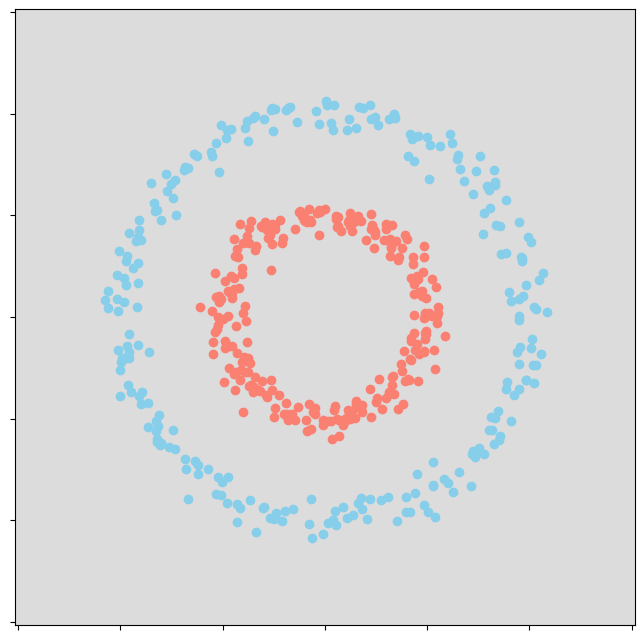

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# We create our artificial data, where we will try to classify two concentric rings of data
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Prediction map resolution
res = 100

# Prediction map coordinates
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)


# Input with each combination of prediction map coordinates
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Empty object at 0.5 from prediction map
_pY = np.zeros((res, res)) + 0.5

#Prediction map display
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

# Data cloud visualization
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()


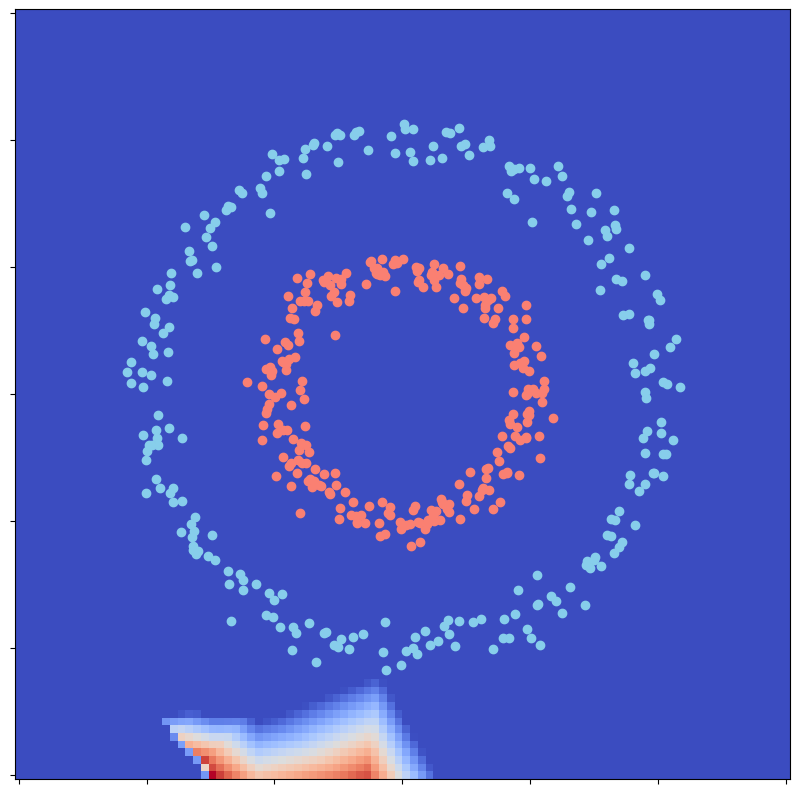

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# We define the entry points of the network, for the matrix X and Y
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # number of neurons per layer

# Layer 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name="Weights_1")
b1 = tf.Variable(tf.random_normal([nn[1]]), name="bias_1")
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Layer 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name="Weights_2")
b2 = tf.Variable(tf.random_normal([nn[2]]), name="bias_2")
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Layer 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name="Weights_3")
b3 = tf.Variable(tf.random_normal([nn[3]]), name="bias_3")

# Y predictions vector
pY = tf.nn.relu(tf.add(tf.matmul(l2, W3), b3))[:,0]

# Predictions evualiation
loss = tf.losses.mean_squared_error(pY, iY)

# We define the network optimizer, so that it minimizes the error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000  # Number of training cycles
iPY = []  # Here we will save the evolution of the predictions, for the animation

with tf.Session() as sess:

  # We inicialize all the network parameters, the matrices W and b.
  sess.run(tf.global_variables_initializer())

  # We iterate n training phases.
  for step in range(n_steps):

    # We evaluate the optimizer, to the cost function and the output tensor pY.
    # The optimizer evaluation will producer the network training.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX : X, iY : Y})

    # Every 25 iterations, we print metrics.
    if step % 25 == 0:

      # Accuracy calculation.
      acc = np.mean(np.round(_pY) == Y)

      # Metrics printing.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', abs)

      # We get predictions for each point on our prediction map, _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX}).reshape((res, res))

      # And we save it to view the animation.
      iPY.append(_pY)


#animation
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación ---")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Data cloud visualization
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())

*Sckit* **Learn**

In [23]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01 #Learning rate
nn = [2, 16, 8, 1] #Número de neuronas por capas

#Creamos el objeto que contendra a nuestra red reunonal, como secuencia de capas
clf = sk.neural_network.MLPRegressor(solver = 'sgd',
                                     learning_rate_init = lr,
                                     hidden_layer_sizes = tuple(nn[1:]),
                                     verbose = True,
                                     n_iter_no_change = 1000,
                                     batch_size = 64)

#Y lo entrenamos con nuestros datos
clf.fit(X, Y)

Iteration 1, loss = 1.57053669
Iteration 2, loss = 0.61799695
Iteration 3, loss = 0.17071566
Iteration 4, loss = 0.13112209
Iteration 5, loss = 0.14931869
Iteration 6, loss = 0.14087069
Iteration 7, loss = 0.12846185
Iteration 8, loss = 0.12553976
Iteration 9, loss = 0.12537850
Iteration 10, loss = 0.12534956
Iteration 11, loss = 0.12515389
Iteration 12, loss = 0.12502049
Iteration 13, loss = 0.12507709
Iteration 14, loss = 0.12515270
Iteration 15, loss = 0.12503940
Iteration 16, loss = 0.12509835
Iteration 17, loss = 0.12510314
Iteration 18, loss = 0.12502598
Iteration 19, loss = 0.12510719
Iteration 20, loss = 0.12512156
Iteration 21, loss = 0.12507538
Iteration 22, loss = 0.12506004
Iteration 23, loss = 0.12504638
Iteration 24, loss = 0.12514759
Iteration 25, loss = 0.12504641
Iteration 26, loss = 0.12504479
Iteration 27, loss = 0.12507349
Iteration 28, loss = 0.12504228
Iteration 29, loss = 0.12503625
Iteration 30, loss = 0.12505011
Iteration 31, loss = 0.12508836
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)